# Markov Compression Implementation

#### Setting up

Sets precision to 5 decimal places

In [1]:
%precision %.5f

'%.5f'

DNA sequence to be compressed

In [2]:
seq = 'AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAGTTCTAACAGTTTTTATTAGAGAGCAGATCT'

In [3]:
len(seq)

90

Assigns integer values for base

In [4]:
seq_dict = {
    'A' : 0,
    'T' : 1,
    'C' : 2,
    'G' : 3
}

n is the number of unique symbols in the string

In [5]:
n = len(set(seq))

k is the order of the markov model

In [6]:
k = 3

The parameter c controls how much probability is assigned to unseen (but possible) events, and plays a key role in the case of high-order models

In [7]:
c = 1

Creates all the different permutations of strings for the contexts in the Markov model

In [8]:
from itertools import product
labels = [''.join(p) for p in product(seq_dict.keys(), repeat=k)]

#### Creating the frequency table

In [9]:
markov_freq = {}

for x in labels:
    markov_freq[x] = [0 for _ in range(n)]

i = k
while i < len(seq):
    markov_freq[seq[i-k:i]][seq_dict[seq[i]]] += 1
    i += 1

In [10]:
markov_freq

{'AAA': [0, 0, 0, 0],
 'AAT': [0, 0, 1, 0],
 'AAC': [2, 0, 0, 1],
 'AAG': [1, 0, 1, 0],
 'ATA': [0, 0, 0, 0],
 'ATT': [1, 0, 0, 0],
 'ATC': [0, 1, 0, 1],
 'ATG': [0, 0, 0, 0],
 'ACA': [1, 0, 0, 2],
 'ACT': [0, 0, 0, 0],
 'ACC': [0, 0, 0, 1],
 'ACG': [0, 2, 0, 0],
 'AGA': [1, 1, 0, 2],
 'AGT': [0, 4, 1, 0],
 'AGC': [1, 1, 0, 0],
 'AGG': [0, 0, 0, 0],
 'TAA': [0, 0, 2, 0],
 'TAT': [0, 1, 0, 0],
 'TAC': [0, 0, 0, 1],
 'TAG': [1, 2, 0, 0],
 'TTA': [1, 1, 0, 2],
 'TTT': [1, 2, 1, 0],
 'TTC': [0, 1, 0, 1],
 'TTG': [0, 1, 1, 0],
 'TCA': [0, 0, 0, 0],
 'TCT': [2, 0, 0, 0],
 'TCC': [0, 0, 0, 0],
 'TCG': [1, 0, 0, 1],
 'TGA': [0, 0, 0, 0],
 'TGT': [0, 1, 0, 0],
 'TGC': [0, 1, 0, 0],
 'TGG': [1, 0, 0, 0],
 'CAA': [0, 0, 0, 1],
 'CAT': [0, 0, 0, 0],
 'CAC': [0, 0, 0, 0],
 'CAG': [1, 2, 0, 0],
 'CTA': [1, 0, 1, 0],
 'CTT': [1, 0, 0, 1],
 'CTC': [0, 0, 0, 0],
 'CTG': [0, 0, 0, 0],
 'CCA': [0, 0, 0, 0],
 'CCT': [0, 0, 0, 0],
 'CCC': [0, 0, 0, 0],
 'CCG': [1, 0, 0, 0],
 'CGA': [1, 0, 1, 0],
 'CGT': [1

#### Calculate probabilities from frequency table

In [11]:
markov_prob = {}

for x in labels:
    markov_prob[x] = [0 for _ in range(n)]

for key in markov_freq.keys():
    arr = markov_freq[key]
    total = sum(arr)
    for i in range(n):
        arr[i] = (arr[i]+c)/(total+(n*c))
    markov_prob[key] = arr

In [12]:
markov_prob

{'AAA': [0.25000, 0.25000, 0.25000, 0.25000],
 'AAT': [0.20000, 0.20000, 0.40000, 0.20000],
 'AAC': [0.42857, 0.14286, 0.14286, 0.28571],
 'AAG': [0.33333, 0.16667, 0.33333, 0.16667],
 'ATA': [0.25000, 0.25000, 0.25000, 0.25000],
 'ATT': [0.40000, 0.20000, 0.20000, 0.20000],
 'ATC': [0.16667, 0.33333, 0.16667, 0.33333],
 'ATG': [0.25000, 0.25000, 0.25000, 0.25000],
 'ACA': [0.28571, 0.14286, 0.14286, 0.42857],
 'ACT': [0.25000, 0.25000, 0.25000, 0.25000],
 'ACC': [0.20000, 0.20000, 0.20000, 0.40000],
 'ACG': [0.16667, 0.50000, 0.16667, 0.16667],
 'AGA': [0.25000, 0.25000, 0.12500, 0.37500],
 'AGT': [0.11111, 0.55556, 0.22222, 0.11111],
 'AGC': [0.33333, 0.33333, 0.16667, 0.16667],
 'AGG': [0.25000, 0.25000, 0.25000, 0.25000],
 'TAA': [0.16667, 0.16667, 0.50000, 0.16667],
 'TAT': [0.20000, 0.40000, 0.20000, 0.20000],
 'TAC': [0.20000, 0.20000, 0.20000, 0.40000],
 'TAG': [0.28571, 0.42857, 0.14286, 0.14286],
 'TTA': [0.25000, 0.25000, 0.12500, 0.37500],
 'TTT': [0.25000, 0.37500, 0.25000

#### Performing arithmetic coding using the created probabilities

Default equal probability distribution in case no context found

In [13]:
default_prob = [1/n for _ in range(n)]

Returns the range of decimal values that defines the current symbol

Parameters:
```
- lr : array : [int, int] -> current range
- prob_arr : array : [int, int, ..., int] -> list of probabilities of each symbol
- index : int : index that is mapped to symbol e.g. A -> 0, T -> 1, C -> 2, G -> 3
```

In [14]:
def arithmetic_range(lr, prob_arr, index):
    l,r = lr
    diff = r-l
    start = l + (sum(arr[:index]) * diff)
    end = l + (sum(arr[:index+1]) * diff)
    return [start, end]

Returns the range of decimal values in [0, 1] for the input string

In [15]:
def arithmetic_coding(string):
    ac_range = [0,1]
    for i in range(len(string)):
        if i < k:
            prob = default_prob
        else:
            prob = markov_prob[string[i-k:i]]
        # print(prob)
        ac_range = arithmetic_range(ac_range, prob, seq_dict[string[i]])
        # print(ac_range, end='\n\n')
    return ac_range

In [16]:
%precision %.200f

'%.200f'

Calculate the range for given string

In [17]:
ans_range = arithmetic_coding(seq)
ans_range

[0.21027905818727549158708711729559581726789474487304687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,
 0.21027905818727549158708711729559581726789474487304687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]

Function to return the middle value

In [18]:
def mid(lr):
    l,r = lr
    return (l+r)/2

Final answer to arithmetic coding

In [19]:
mid(ans_range)

0.21027905818727549158708711729559581726789474487304687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

*Need to figure out how to store such a long decimal value efficiently and accurately in computer memory. Another research topic in itself.*

#### Calculate space savings

In [20]:
import sys

In [21]:
ans_size = sys.getsizeof(mid(ans_range))
ans_size

24

In [22]:
original_size = sys.getsizeof(seq)
original_size

139

In [23]:
%precision %.2f

'%.2f'

#### Total savings in percent

In [24]:
ans_size/original_size * 100

17.27

#### Visualizing the transition matrix of the Markov model

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

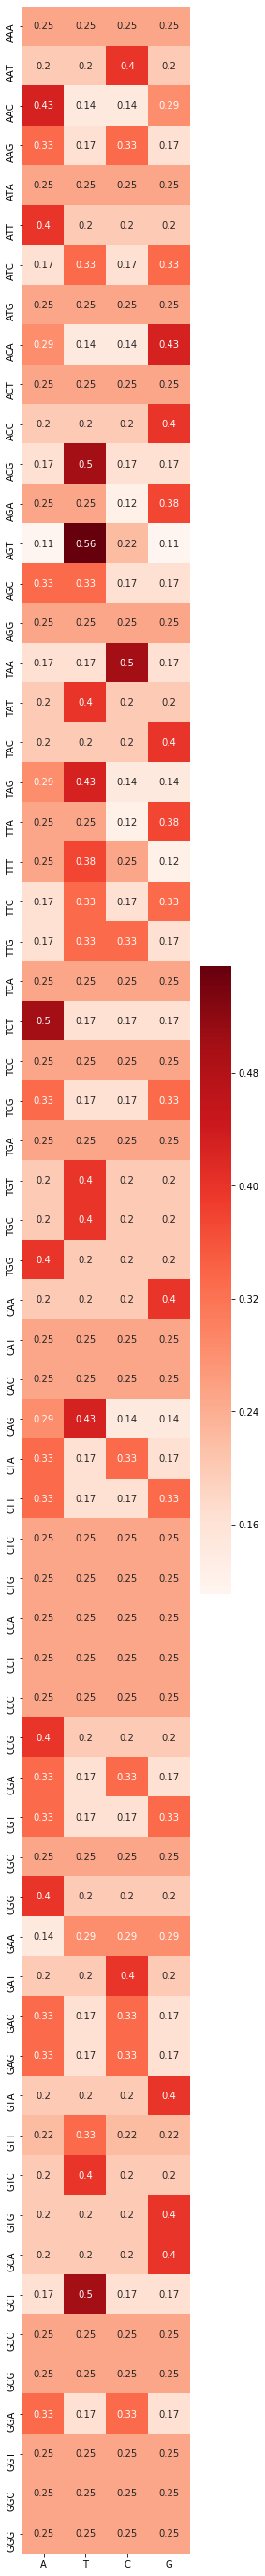

In [26]:
f, ax = plt.subplots(figsize=(4, 50))
sns.heatmap(list(markov_prob.values()), cmap='Reds', annot=True, yticklabels=markov_prob.keys(), xticklabels=seq_dict.keys(), ax=ax)

#### Function to calculate entropy

$Entropy\; H(X) = -\sum p(X)\log p(X)$

In [27]:
import math

In [28]:
def entropy_symbol(symbol, given_symbol):
    if len(given_symbol) != k or len(symbol) != 1:
        print('ERROR: Provide correct length parameters')
        return -1
    prob = markov_prob[given_symbol][seq_dict[symbol]]
    return prob * (-1*math.log2(prob))

In [29]:
entropy_symbol('G', 'GTA')

0.53